
[2023-02-28] 开盘训练 HMM
[2023-02-28] HMM 训练失败

[2023-03-01] 开盘训练 HMM
[2023-03-01] HMM 训练成功
[2023-03-01 01:09:00] β=1.4917  Z=0.39  状态=0  Pos=0
[2023-03-01 01:10:00] β=1.4945  Z=1.89  状态=0  Pos=0
[2023-03-01 01:11:00] β=1.4891  Z=-2.53  状态=0  Pos=0
[2023-03-01 01:12:00] β=1.4891  Z=0.11  状态=0  Pos=0
[2023-03-01 01:13:00] β=1.4899  Z=0.50  状态=0  Pos=0
[2023-03-01 01:14:00] β=1.4909  Z=0.56  状态=0  Pos=0
[2023-03-01 01:15:00] β=1.4905  Z=-0.17  状态=0  Pos=0
[2023-03-01 01:16:00] β=1.4933  Z=1.47  状态=0  Pos=0
[2023-03-01 01:17:00] β=1.4934  Z=0.02  状态=0  Pos=0
[2023-03-01 01:18:00] β=1.4918  Z=-0.88  状态=0  Pos=0
[2023-03-01 01:19:00] β=1.4936  Z=0.92  状态=0  Pos=0
[2023-03-01 01:20:00] β=1.4965  Z=1.47  状态=0  Pos=0
[2023-03-01 01:21:00] β=1.4975  Z=0.38  状态=0  Pos=0
[2023-03-01 01:22:00] β=1.4997  Z=1.06  状态=0  Pos=0
[2023-03-01 01:23:00] β=1.5005  Z=0.25  状态=0  Pos=0
[2023-03-01 01:24:00] β=1.5005  Z=-0.19  状态=0  Pos=0
[2023-03-01 01:25:00] β=1.4959  Z=-2.44  状态=0  Pos=0
[2023-03-01 01:26:00]

Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the st

[2023-06-13] HMM 训练成功

[2023-06-14] 开盘训练 HMM
[2023-06-14] HMM 训练成功
[2023-06-14 01:09:00] β=1.5952  Z=-1.61  状态=2  Pos=0
[2023-06-14 01:10:00] β=1.5949  Z=-0.46  状态=2  Pos=0
[2023-06-14 01:11:00] β=1.5944  Z=-0.57  状态=0  Pos=0
[2023-06-14 01:12:00] β=1.5934  Z=-1.00  状态=0  Pos=0
[2023-06-14 01:13:00] β=1.5934  Z=-0.11  状态=0  Pos=0
[2023-06-14 01:14:00] β=1.5937  Z=0.32  状态=0  Pos=0
[2023-06-14 01:15:00] β=1.5927  Z=-1.07  状态=0  Pos=0
[2023-06-14 01:16:00] β=1.5922  Z=-0.52  状态=0  Pos=0
[2023-06-14 01:17:00] β=1.5944  Z=2.04  状态=0  Pos=0
[2023-06-14 01:18:00] β=1.5938  Z=-0.69  状态=0  Pos=0
[2023-06-14 01:19:00] β=1.5944  Z=0.51  状态=0  Pos=0
[2023-06-14 01:20:00] β=1.5959  Z=1.36  状态=0  Pos=0
[2023-06-14 01:21:00] β=1.5947  Z=-1.28  状态=0  Pos=0
[2023-06-14 01:22:00] β=1.5939  Z=-0.76  状态=0  Pos=0
[2023-06-14 01:23:00] β=1.5955  Z=1.36  状态=0  Pos=0
[2023-06-14 01:24:00] β=1.5946  Z=-0.90  状态=0  Pos=0
[2023-06-14 01:25:00] β=1.5954  Z=0.68  状态=0  Pos=0
[2023-06-14 01:26:00] β=1.5955  Z=-0.0

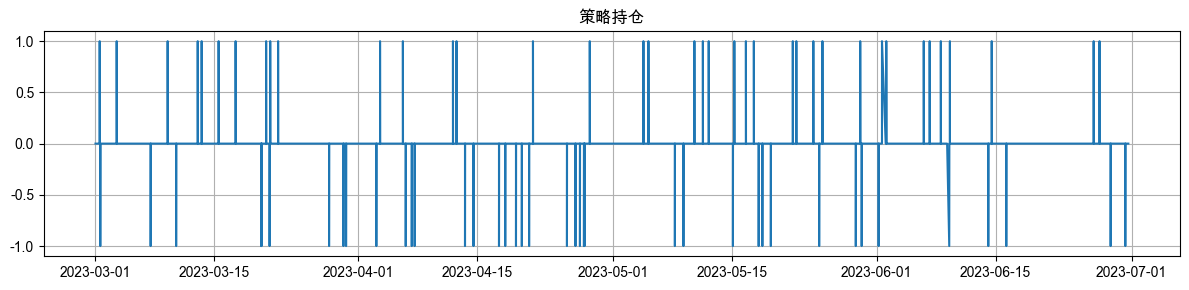

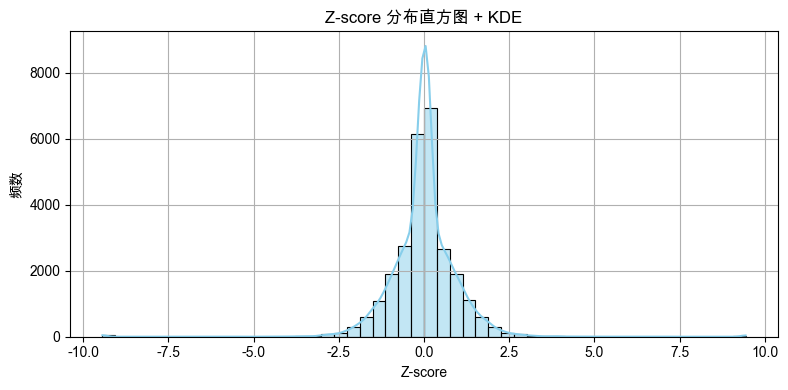

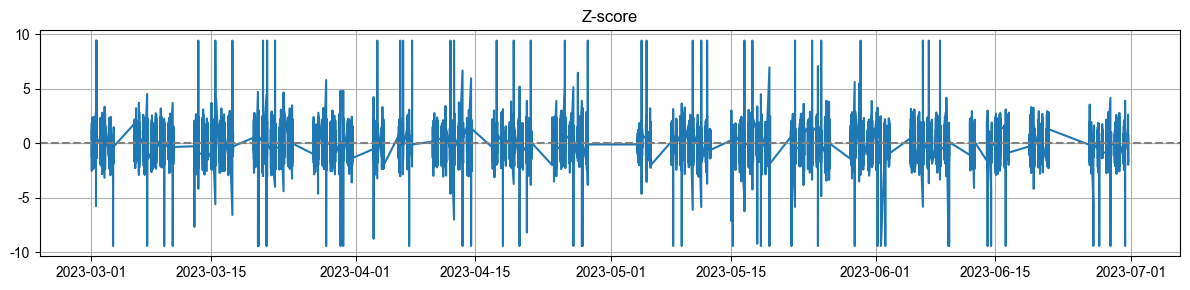

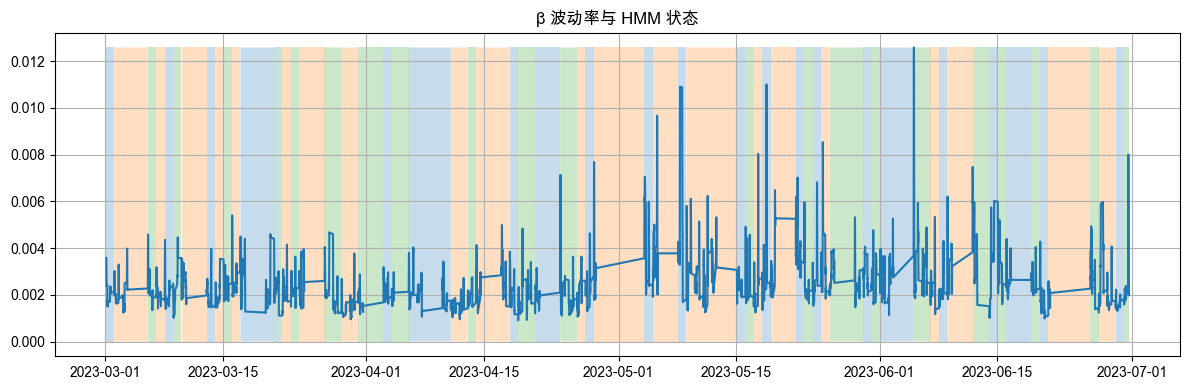

In [3]:
import numpy as np
import pandas as pd
from collections import deque
from hmmlearn.hmm import GaussianHMM
from datetime import date
from tqsdk import TqApi, TqAuth, TqBacktest, BacktestFinished, TargetPosTask
from statsmodels.robust.scale import mad
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial Unicode MS'  
# plt.rcParams['font.family'] = 'SimHei'    
plt.rcParams['axes.unicode_minus'] = False  

# === 策略参数 ===
SYMBOL_Y = "DCE.j2309"
SYMBOL_X = "DCE.jm2309"
OBS_VAR = 0.01
STATE_VAR = 0.0001
Z_WINDOW = 60
STD_WINDOW = 90
MIN_POINTS = 10
N_COMPONENTS = 3
STATE_THRESHOLDS = {0: (3.0, -3.0), 1: (3.5, -3.5), 2: (5.0, -5.0)}
CLOSE_H = 0.6
CLOSE_L = -0.6
STOP_SPREAD = 1.0
BETA_DIFF_THRESH = 0.02
INIT_CAP = 1e7
POS_PCT = 0.05

# === Kalman Filter ==
# === Z-score ===
class KalmanStateWithZ:
    def __init__(self, obs_var=OBS_VAR, state_var=STATE_VAR, init_mean=1.0, init_var=1.0, std_window=90):
        self.obs_var = obs_var
        self.state_var = state_var
        self.mean = init_mean
        self.var = init_var
        self.residuals = deque(maxlen=std_window)

    def step(self, y, x):
        pred_mean = self.mean
        pred_var = self.var + self.state_var
        k_gain = pred_var * x / (pred_var * x ** 2 + self.obs_var)
        self.mean = pred_mean + k_gain * (y - pred_mean * x)
        self.var = (1 - k_gain * x) * pred_var
        return self.mean
    
    def update_z(self, y, x):
        beta = self.step(y, x)
        spread = y - beta * x
        self.residuals.append(spread)
        if len(self.residuals) < 10:
            return np.nan, beta
        mu = np.median(self.residuals)
        scale = mad(self.residuals)
        scale = max(scale, 1e-6)
        z = (spread - mu) / scale
        return z, beta

# === HMM 训练 ===
def train_hmm_by_minute(df, std_window=60, min_points=10, n_components=3):
    if len(df) < min_points:
        return None
    df['Minute'] = df['datetime'].dt.floor("min")
    dfm = df.groupby('Minute').first().reset_index()
    init_mean = dfm.iloc[0]["close_y"] / dfm.iloc[0]["close_x"]
    kf = KalmanStateWithZ(init_mean=init_mean, std_window=std_window)

    z_list = []
    for _, row in dfm.iterrows():
        z, _ = kf.update_z(row["close_y"], row["close_x"])
        z_list.append(z)

    z_arr = np.array([z for z in z_list if not np.isnan(z)])
    if len(z_arr) < min_points:
        return None

    model = GaussianHMM(n_components=n_components, covariance_type="full", n_iter=100)
    model.fit(z_arr.reshape(-1, 1))
    return model

# === 回测环境初始化 ===
api = TqApi(backtest=TqBacktest(start_dt=date(2023, 3, 1), end_dt=date(2023, 7,1)),
            auth=TqAuth("Lawrence-047", "Gzy13802002!"))
quote_y = api.get_quote(SYMBOL_Y)
quote_x = api.get_quote(SYMBOL_X)
klines_y = api.get_kline_serial(SYMBOL_Y, 60)
klines_x = api.get_kline_serial(SYMBOL_X, 60)
target_y = TargetPosTask(api, SYMBOL_Y)
target_x = TargetPosTask(api, SYMBOL_X)

# === 状态记录 ===
model, kf = None, None
position = 0
entry_z, frozen_beta, entry_time = None, None, None
today = None
prev_z = None
state_buffer = deque(maxlen=5)

log_times, log_positions, log_zscores, log_states, log_spreads, log_beta = [], [], [], [], [], []

try:
    while True:
        api.wait_update()
        if not api.is_changing(klines_y.iloc[-1], "datetime"):
            continue

        now = pd.to_datetime(klines_y.iloc[-1]["datetime"], unit="ns")
        new_day = now.date()
        price_y = klines_y.iloc[-1]["close"]
        price_x = klines_x.iloc[-1]["close"]

        if today != new_day:
            today = new_day
            print(f"\n[{today}] 开盘训练 HMM")
            history = pd.DataFrame({
                "datetime": klines_y.datetime / 1e9,
                "close_y": klines_y.close,
                "close_x": klines_x.close,
            }).dropna()
            history["datetime"] = pd.to_datetime(history["datetime"], unit="s")
            history = history[history["datetime"].dt.date < today]  # 严格避免未来数据

            model = train_hmm_by_minute(history, std_window=STD_WINDOW, min_points=MIN_POINTS, n_components=N_COMPONENTS)
            if model:
                print(f"[{today}] HMM 训练成功")
            else:
                print(f"[{today}] HMM 训练失败")
            kf = KalmanStateWithZ(init_mean=price_y / price_x, std_window=STD_WINDOW)
            
        beta = kf.step(price_y, price_x)
        beta_used = frozen_beta if position != 0 else beta
        spread = price_y - beta_used * price_x
        kf.residuals.append(spread)
        if len(kf.residuals) < MIN_POINTS:
            continue
        mu = np.mean(kf.residuals)
        std = np.std(kf.residuals)
        std = max(std, 1e-6)
        z = (spread - mu) / std
        
        if np.isnan(z) or model is None:
            continue

        try:
            predicted_state = int(model.predict(np.array([[z]]))[0])
            state_buffer.append(predicted_state)
            # 滑动窗口多数票平滑
            state = max(set(state_buffer), key=state_buffer.count)
        except:
            continue
        open_h, open_l = STATE_THRESHOLDS.get(state, (3.0, -3.0))

        print(f"[{now}] β={beta:.4f}  Z={z:.2f}  状态={state}  Pos={position}")

        # 日志记录
        log_times.append(now)
        log_positions.append(position)
        log_zscores.append(z)
        log_states.append(state)
        log_spreads.append(spread)
        log_beta.append(beta_used)

        # === 开仓 ===
        if position == 0:
            lots = int(INIT_CAP * POS_PCT / quote_y.margin)
            lots_x = int(lots * beta * price_y * quote_y.volume_multiple / (price_x * quote_x.volume_multiple))

            if z < open_l:
                target_y.set_target_volume(lots)
                target_x.set_target_volume(-lots_x)
                position = 1
                entry_z = z
                frozen_beta = beta
                entry_time = now
                print("开仓：多Y 空X")

            elif z > open_h:
                target_y.set_target_volume(-lots)
                target_x.set_target_volume(lots_x)
                position = -1
                entry_z = z
                frozen_beta = beta
                entry_time = now
                print("开仓：空Y 多X")

        # === 平仓 ===
        if position != 0 and entry_time is not None:
            center_z = 0.3 if entry_z > 0 else -0.3
            crossed_center = (position == 1 and z > center_z) or (position == -1 and z < center_z)
            stop_cond = (position == 1 and z < entry_z - STOP_SPREAD) or (position == -1 and z > entry_z + STOP_SPREAD)
            drift_cond = abs(beta - frozen_beta) / abs(frozen_beta) > BETA_DIFF_THRESH if frozen_beta else False

            if crossed_center or stop_cond or drift_cond:
                target_y.set_target_volume(0)
                target_x.set_target_volume(0)
                print(f"平仓：Z={z:.2f}, 原Z={entry_z:.2f}, β变动={abs(beta - frozen_beta):.4f}")
                position = 0
                entry_z = None
                frozen_beta = None
                entry_time = None

except BacktestFinished:
    print("✅ 回测结束")
    api.close()

    df_plot = pd.DataFrame({
        "time": log_times,
        "position": log_positions,
        "zscore": log_zscores,
        "state": log_states,
        "spread": log_spreads,
        "beta": log_beta
    })
    df_plot["beta_std"] = df_plot["beta"].rolling(window=90).std()

    plt.figure(figsize=(12, 3))
    plt.plot(df_plot["time"], df_plot["position"])
    plt.title("策略持仓")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    import seaborn as sns

    plt.figure(figsize=(8, 4))
    sns.histplot(df_plot["zscore"].dropna(), kde=True, bins=50, color="skyblue")
    plt.title("Z-score 分布直方图 + KDE")
    plt.xlabel("Z-score")
    plt.ylabel("频数")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12, 3))
    plt.plot(df_plot["time"], df_plot["zscore"], label="Z-score")
    plt.axhline(0, color="gray", linestyle="--")
    plt.title("Z-score")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 4))
    plt.plot(df_plot["time"], df_plot["beta_std"], label="Rolling β Std")
    for s in sorted(df_plot["state"].unique()):
        mask = df_plot["state"] == s
        plt.fill_between(df_plot["time"], 0, df_plot["beta_std"].max(), where=mask,
                         alpha=0.25)
    plt.title("β 波动率与 HMM 状态")
    plt.grid(True)
    plt.tight_layout()
    plt.show()